# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [6]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].nunique()
print("Number of unique mice IDs:", unique_mice)

Number of unique mice IDs: 249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

print("Duplicate mice by ID number:", duplicate_mouse_ids)


Duplicate mice by ID number: ['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get all the data for the duplicate Mouse ID
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("Data associated with duplicate mouse ID:")
print(duplicate_mouse_data)


Data associated with duplicate mouse ID:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propri

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

print("Clean DataFrame without duplicate mouse ID:")
print(cleaned_data)


Clean DataFrame without duplicate mouse ID:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1            

In [10]:
# Checking the number of mice in the clean DataFrame.
unique_mice_cleaned = cleaned_data['Mouse ID'].nunique()

print("Number of mice in the clean DataFrame:", unique_mice_cleaned)


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Assemble the resulting series into a single summary DataFrame.
print("Summary statistics table of tumor volume for each regimen:")
print(summary_stats)

Summary statistics table of tumor volume for each regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [12]:
# Using the aggregation method to produce summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

print("Summary statistics table of tumor volume for each regimen:")
print(summary_stats)


Summary statistics table of tumor volume for each regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

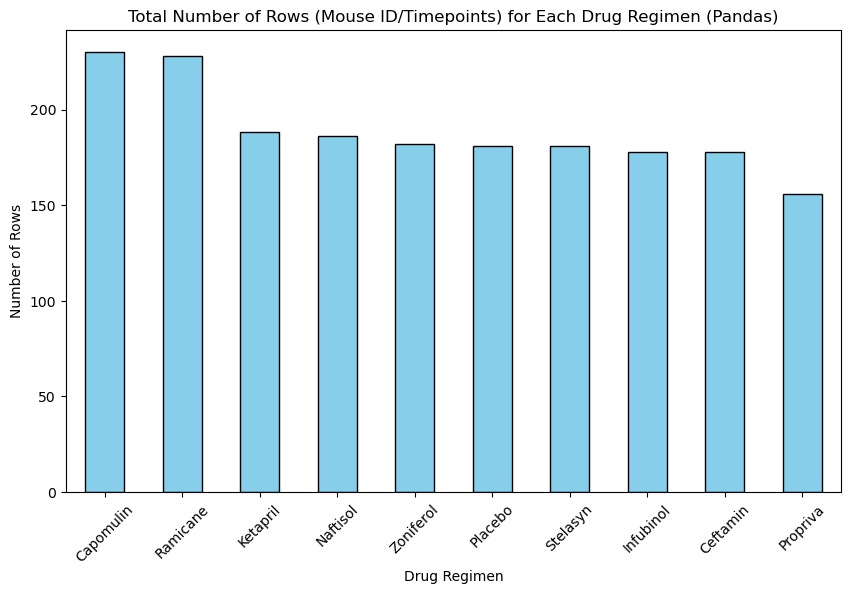

In [13]:
# Generate a bar plot using Pandas
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()



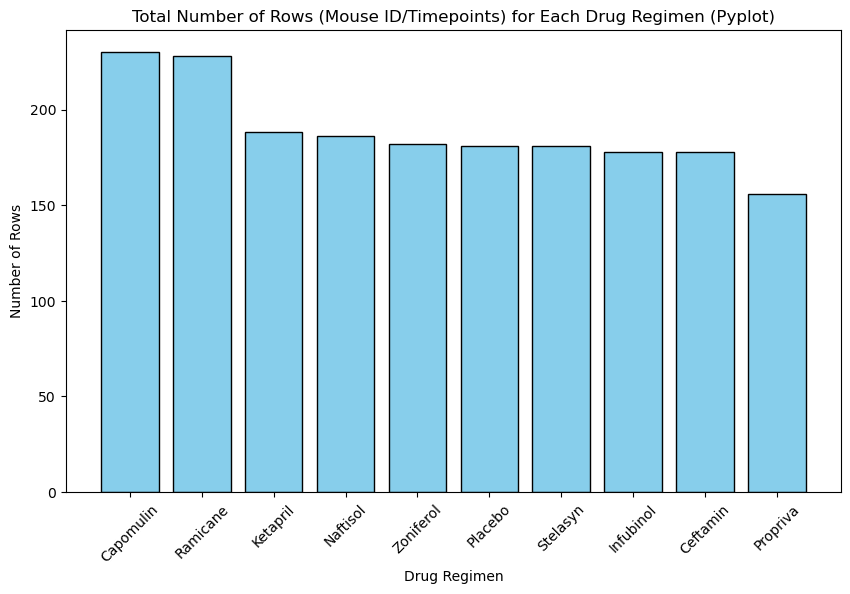

In [15]:
# Count the occurrences of each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Extract regimen names and corresponding counts
regimen_names = drug_regimen_counts.index
regimen_counts = drug_regimen_counts.values

# Create bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, regimen_counts, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


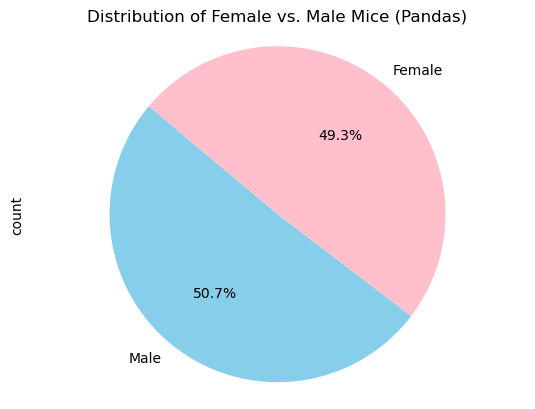

In [18]:
# Generate a pie plot using Pandas
gender_counts = cleaned_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)

# Add title
plt.title('Distribution of Female vs. Male Mice (Pandas)')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()



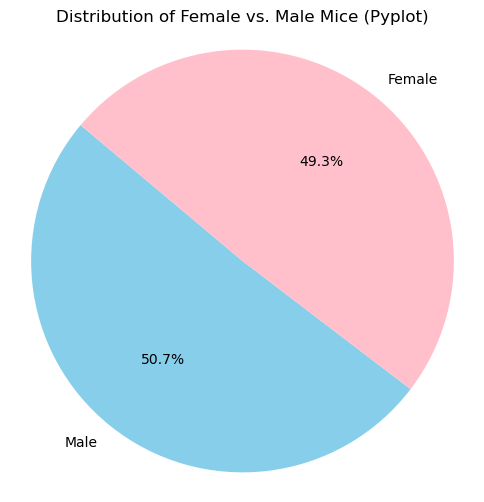

In [19]:
# Count the occurrences of each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Create pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)

# Add title
plt.title('Distribution of Female vs. Male Mice (Pyplot)')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Define the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = cleaned_data.merge(last_timepoints, on=['Mouse ID', 'Timepoint'])

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(treatment_regimens)]

print("Final tumor volume of each mouse across specified treatment regimens:")
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


Final tumor volume of each mouse across specified treatment regimens:
    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       k403     Ramicane           22.050126
1       s185    Capomulin           23.343598
2       x401    Capomulin           28.484033
3       m601    Capomulin           28.430964
4       g791     Ramicane           29.128472
..       ...          ...                 ...
235     x822     Ceftamin           61.386660
237     y163    Infubinol           67.685569
241     y769     Ceftamin           68.594745
242     y865     Ceftamin           64.729837
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [21]:
# Put treatments into a list for a loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles, IQR, and determine potential outliers for each treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


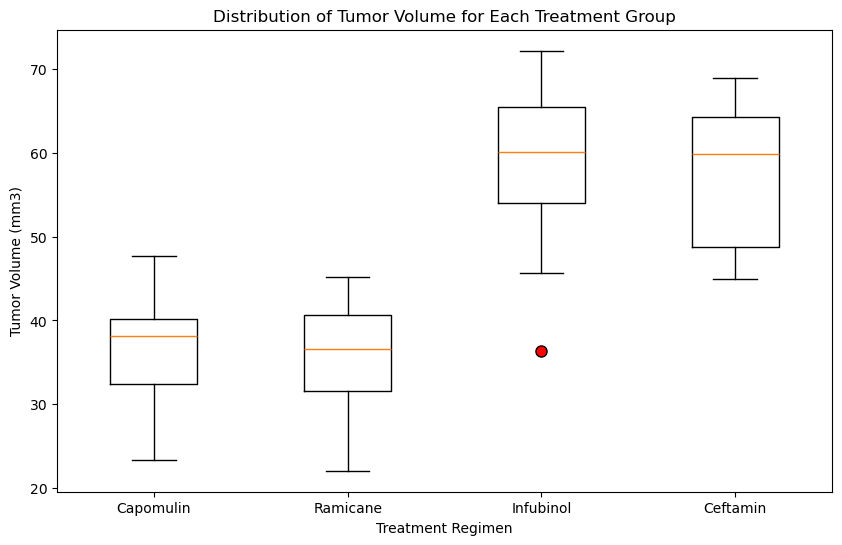

In [22]:
# Generate a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))

# Add title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()


## Line and Scatter Plots

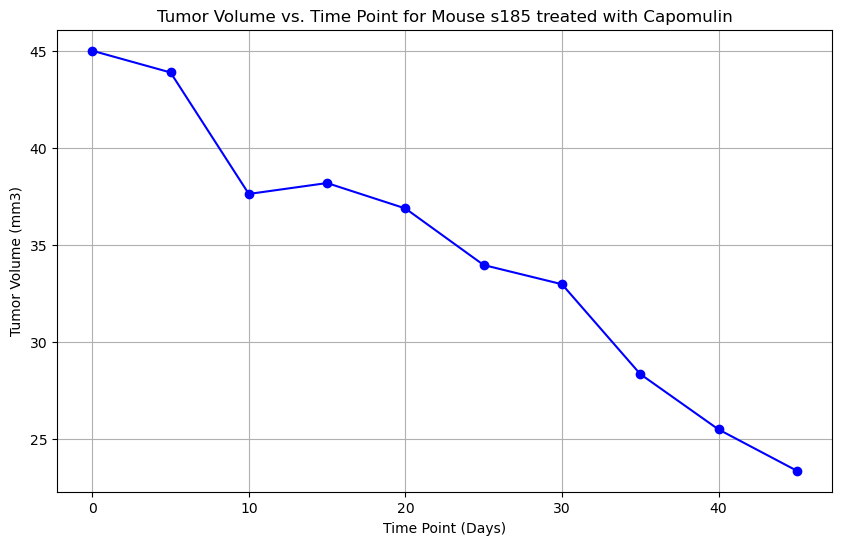

In [23]:
# Filter data for Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin (for example, the first mouse in the dataset)
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter data for the selected mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()



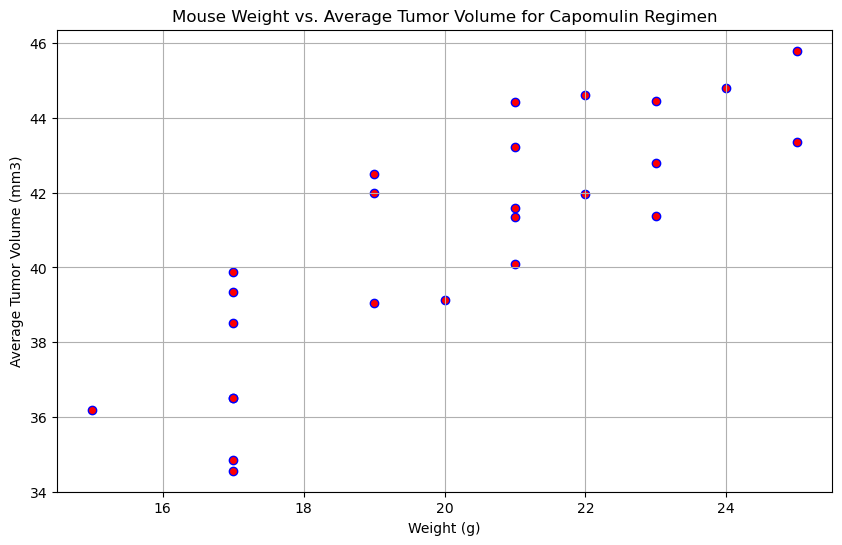

In [24]:
# Group data by Mouse ID and calculate average tumor volume and weight for each mouse
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Extract average tumor volume and weight
average_tumor_volume = capomulin_grouped['Tumor Volume (mm3)']
mouse_weight = capomulin_grouped['Weight (g)']

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='r', edgecolors='b')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()



## Correlation and Regression

Correlation coefficient between mouse weight and average observed tumor volume: 0.841936342469472


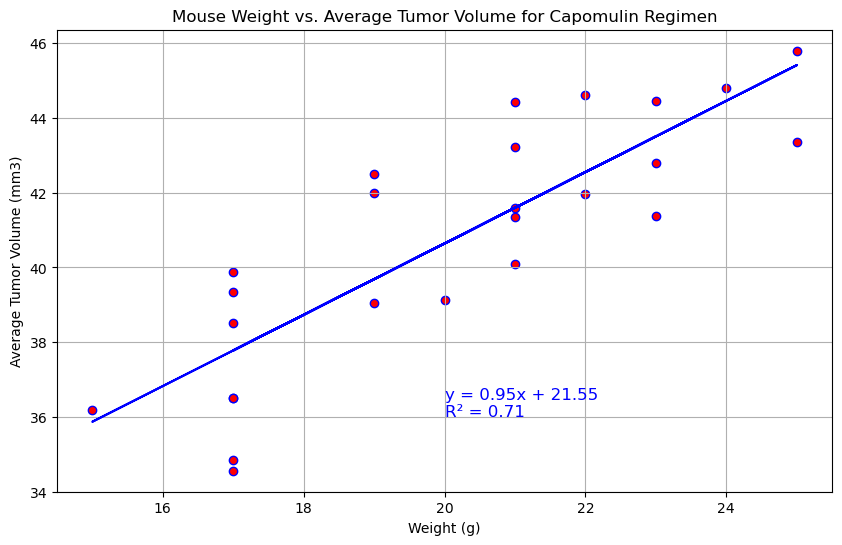

In [26]:
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, average_tumor_volume)
print(f"Correlation coefficient between mouse weight and average observed tumor volume: {correlation_coefficient}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)

# Calculate the regression line
regression_line = slope * mouse_weight + intercept

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='r', edgecolors='b')

# Plot the regression line
plt.plot(mouse_weight, regression_line, color='b')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add regression equation to the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}',
             xy=(20, 36), fontsize=12, color='blue')

# Show plot
plt.grid(True)
plt.show()

